In [23]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import balanced_accuracy_score,f1_score,auc,roc_auc_score,accuracy_score, precision_score,recall_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

## Importing Data and Preprocessing

In [24]:
train = pd.read_csv("training.csv",sep=';', thousands=',')
test = pd.read_csv("validation.csv",sep=';', thousands=',')

combined = train.append(test)
numerical = ["variable2","variable3","variable8","variable11","variable14","variable15","variable17"]
#Get the most frequent values for the numerical data to fill the NA values
for col in numerical:
    combined[col].fillna(combined[col].mean(), inplace=True)
    combined[col].fillna(combined[col].mean(), inplace=True)

categorical = ['variable1', 'variable4', 'variable5', 'variable6', 'variable7', 'variable9', 'variable10',
      'variable12', 'variable13']

#Get the most frequent values for the categorical data to fill the NA values
for col in categorical:
    combined[col].fillna(combined[col].mode()[0], inplace=True)
    combined[col].fillna(combined[col].mode()[0], inplace=True)
#Drop Variable 18 since most values are NA
combined.drop(columns=["variable18"],axis=1,inplace=True)


In [25]:
#
Y= (train[train.columns[-1]]=="yes.").astype(float)

Y_test= (test[test.columns[-1]]=="yes.").astype(float)

In [26]:
print("% positive in train_set:" +str( 100*np.sum(Y==1)/len(Y)))
print("% positive in test_set:" +str(100*np.sum(Y_test==1)/len(Y_test)))

% positive in train_set:92.54054054054055
% positive in test_set:46.5


In [27]:
#combined =combined.fillna(combined.mode().iloc[0])
for i,j in zip(combined.columns,combined.dtypes):
  if (combined[i].isnull().values.any() == True):
    print(i)
    print(combined[i].value_counts(dropna=False))
    print("Count of NaN: "+ str(combined[i].isna().sum()))
    print(str(combined[i].isna().sum()/combined.shape[0]))
    print("----------------------------")

In [28]:
X=combined[combined.columns[:-1]]
for i,j in zip(X.columns,X.dtypes):
  if ("64" not in str(j)):
    print(i,j)

    X[i]=X[i].astype(str)
    le = preprocessing.LabelEncoder()
    temp = le.fit_transform(X[i])
    X[i]=temp
X_train =X.to_numpy()[:train.shape[0]]
X_test =X.to_numpy()[train.shape[0]:]

variable1 object
variable4 object
variable5 object
variable6 object
variable7 object
variable9 object
variable10 object
variable12 object
variable13 object


In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, Y)
pred= clf.predict(X_test)
pred_train= clf.predict(X_train)


print("Test ROC_AUC: "+str(roc_auc_score(pred,Y_test)))
print("Test Accuracy: "+str(accuracy_score(pred,Y_test)))
print("Test Precision: "+str(precision_score(pred,Y_test)))
print("Test Recall: "+str(recall_score(pred,Y_test)))
print("Test F1-score: "+str(f1_score(pred,Y_test)))
print("-------------------------------------")

print("Training Precision: "+str(precision_score(pred_train,Y)))
print("Training Recall: "+str(recall_score(pred_train,Y)))
print("Training F1-score: "+str(f1_score(pred_train,Y)))

Test ROC_AUC: 0.8634271099744245
Test Accuracy: 0.85
Test Precision: 0.956989247311828
Test Recall: 0.7739130434782608
Test F1-score: 0.8557692307692307
-------------------------------------
Training Precision: 0.9205607476635514
Training Recall: 0.9840774274118015
Training F1-score: 0.9512599969820432


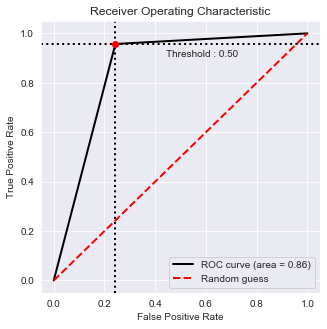

In [31]:
#!pip install plot_metric
import matplotlib.pyplot as plt
from plot_metric.functions import BinaryClassification
bc = BinaryClassification(Y_test, pred, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

Since we are working with a very imbalanced dataset towards the yes label, our main metrics to consider, is Precision and recall, since those are the ones that focus on the positive label -in our case the yes label- and we managed to achieve a very good Precision of 92% and Recall of 98% on our trainset

Now with our test set, its already balanaced so having metrics such as Accuracy and ROC should work just fine as we would only use F1-score, Recall and Precision mostly when we deal with unbalanced data. As seen above, from the plot we have an ROC of 0.86 on our Trainset and an Accuracy of 0.85

We chose the LDA classifier cause it provides the highest accuracies out of all ensemble and Linear Classifiers, so it suggests that PCA would be a good way for dimensionality reduction.